<div style="text-align: center; font-size:xx-large; font-weight:bold;">King County 지역의 주택 거래 데이터를 이용한 주택 가격 예측</div>

<br>

<div style="text-align: center; font-size:x-large;">기계학습 기말 레포트</div>

<div style="text-align: center; font-size:large;">2024. 12</div>

## **1. 데이터 확정**

---

&nbsp; 해당 분석은 **kaggle**의 **House Sales in King County, USA** 데이터셋<sup>[1](#dataset)</sup>을 사용하여 진행되었으며, 사용된 데이터셋은 워싱턴 주에서 가장 인구가 많은 King County 지역에서 2014년 5월부터 2015년 5월까지 이뤄진 실제 주택 거래 정보를 가지고 있다. 여기에는 반응변수인 판매 가격뿐만 아니라 판매 일자, 완공 년도, 주변 입지 및 품질에 대한 지표 등이 포함되며, 주택이 강과 바다 등 물가를 바라보는 여부를 제외하면 모든 변수를 수치형 변수로 취급할 수 있다.

<p align="center" style="color:gray">
    <div style="text-align: center;">
      <img style="margin:10px 0 0 0" src="https://github.com/HollyRiver/ML2024/blob/main/hw/%EA%B8%B0%EB%A7%90%20%EB%B0%9C%ED%91%9C/graphics/King%20County.png?raw=true" alt="Washington-King County" width=1200 /> <br>
         Washington주의 King County 지역. <mark>Washington D.C가 아니다.</mark>
    </div>
</p>

<a name="dataset">1</a>: https://www.kaggle.com/datasets/harlfoxem/housesalesprediction

## **2. 데이터 설명**

---

&nbsp; **House Sales in King County, USA** 데이터셋(이하, 주택 판매 데이터셋)은 총 $21,613$건의 주택 거래에 대한 $21$개의 변수를 가지고 있다. 모든 거래 내역에 대해서 결측치는 존재하지 않았으며, 각 변수들에 대한 설명은 아래와 같다.

|변수|타입|설명|세부사항|
|:-|:-|:-|:-|
|id|integer|주택 판매 고유번호||
|date|object|주택 판매 일자(`YYYYMMDDT000000`)|일별 데이터|
|bedrooms|integer|침실의 수||
|bathrooms|float|화장실의 수|소수점(0.5)은 목욕 시설이 없는 화장실을 의미|
|sqft_living|integer|주택 내부 총 생활공간의 면적$(\text{ft}^2)$||
|sqft_lot|integer|가용한 토지공간의 면적$(\text{ft}^2)$||
|floors|float|주택의 층수|소수점(0.5)은 다락과 같은 부가적인 공간을 의미|
|view|integer|주택의 전망에 대한 평가 지수|0부터 4까지의 값을 가지며, 클수록 좋음|
|condition|integer|주택 상태에 대한 평가 지수|1부터 5까지의 값을 가지며, 클수록 좋음|
|grade|integer|주택의 건축 및 디자인에 대한 전반적인 품질 수준 평가 지수|1부터 13까지의 값을 가지며, 클수록 좋음|
|sqft_above|integer|지면 위 주택 내부 공간의 면적$(\text{ft}^2)$||
|sqft_basement|integer|지면 아래 주택 내부 공간의 면적$(\text{ft}^2)$||
|yr_built|integer|주택 완공년도||
|yr_renovated|integer|주택을 마지막으로 보수한 연도|0은 완공 이후 보수하지 않았음을 의미|
|zipcode|integer|주택이 속하는 우편번호 지역||
|lat|float|주택 위치의 위도||
|long|float|주택 위치의 경도||
|sqft_living15|integer|가장 가까운 15개 가구의 주택 내부 총 생활공간의 면적$(\text{ft}^2)$||
|sqft_lot15|integer|가장 가까운 15개 가구의 총 가용 토지공간의 면적$(\text{ft}^2)$||
|waterfront|binary|주택이 물가를 바라보고 있는지의 여부|1은 물가를 바라보는 것을 의미|
|||||
|**price**|**float**|**주택 판매 가격($)**|**반응변수**|

&nbsp; 해당 분석의 목적은 반응변수인 주택 가격(`price`)과 다른 설명변수 간 관계를 파악하고, 예측에서의 오차를 최소화하는 것이다. 이에 따라 모형의 평가를 위한 데이터셋을 구분할 필요가 존재하였고, 이는 데이터셋을 셔플하여 `test` 데이터셋이 $3$인 $7:3$의 비율로 쪼갬으로써 해결하였다. `train` 데이터셋의 행은 $15129$개, `test` 데이터셋의 행은 $6484$개로 분리되었다.

&nbsp; 다중선형회귀모형을 사용하여 각 설명변수가 반응변수에 미치는 영향을 대략적으로 파악할 것이고, 최종적으로 사용할 부스팅 모형은 수치형 설명변수가 대부분이기 때문에 `XGBoost`를 이용하여 구성하였다. 최적의 모형을 찾기 위해 교차검증을 통한 변수 및 초매개변수 선택 과정을 거쳤으며, 성능 지표로는 $\text{RMSE}$를 사용하였다. 분석 및 시각화에는 python의 `sklearn`, `pygam`, `xgboost`, `matplotlib`, `plotly` 라이브러리 등을 사용하였다.

## **3. 데이터 시각화 및 EDA**

---

&nbsp; 적합 모형과의 일관성을 확보하기 위해 데이터 시각화 및 EDA에는 `train` 데이터셋만 사용하였다.

### **A. 반응변수 주택 판매 가격의 분포**

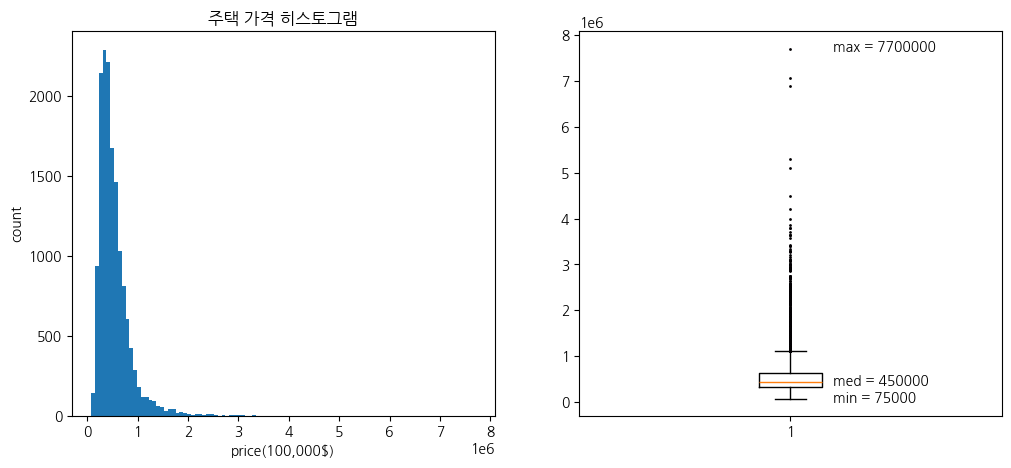

&nbsp; 주택 가격의 단변량 분포를 히스토그램과 상자 그림을 통해 시각화하였다. 거래 가격이 높은 쪽에서 상당히 많은 이상치가 존재하여 전형적인 오른쪽으로 기울어진 분포를 띄고 있다. 선형 모형 구성 이전에 정규화 과정을 거치는 것이 성능 향상에 도움을 줄 수 있다.

### **B. 각 설명변수들과 반응변수 간 관계 파악**

`-` 개별 설명변수(구매일자 제외)와 반응변수 간 산점도

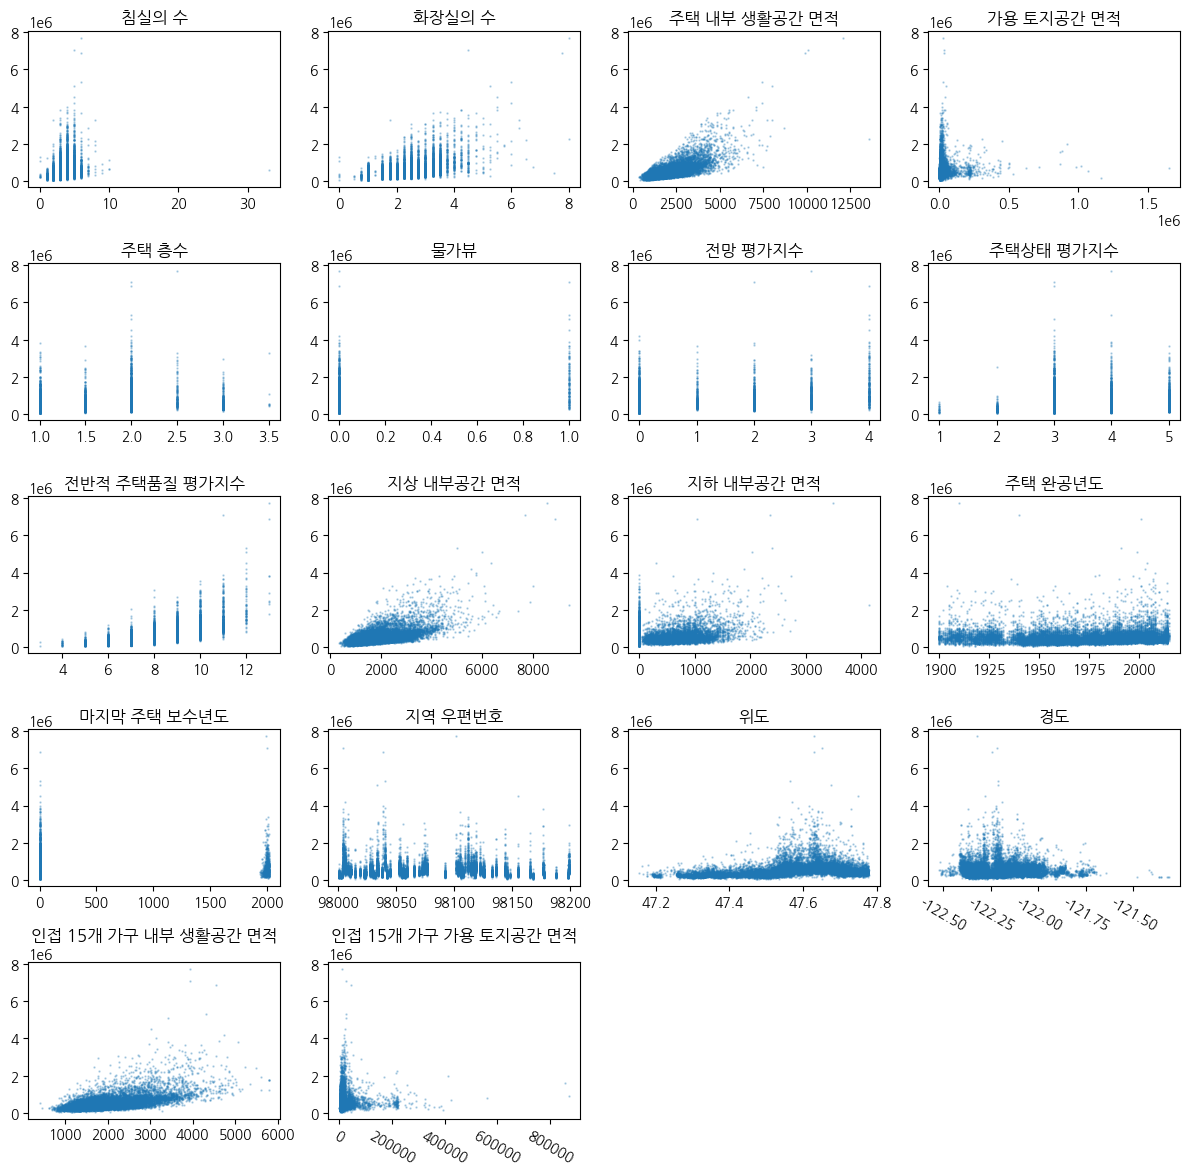

&nbsp; 개별 설명변수와 반응변수 간 관계를 파악하기 위해, 구매 일자를 제외한 각 설명변수와 반응변수 간 산점도를 그려보았다. 모든 그래프에서 $x$축은 주택가격이다. 육안 상 침실의 수, 화장실의 수, 주택 내부 생활공간 면적, 전반적 주택품질 평가지수, 지상 내부공간 면적, 지하 내부공간 면적, 인접 15개 가구 내부 생활공간 면적이 증가할수록 주택가격이 증가하는 것처럼 보인다.

&nbsp; 또한, 마지막 주택 보수 년도의 경우, 보수를 하지 않았을 때 그 값이 0으로 입력되었기 때문에 주택 완공년도 등과의 교호작용을 고려하지 않는 이상, 선형 모형에선 예측에 좋은 영향을 끼치지 못할 것으로 여겨진다.

`-` 구매 일자 관련 시각화

![monthly price boxplot.png](<attachment:monthly price boxplot.png>)
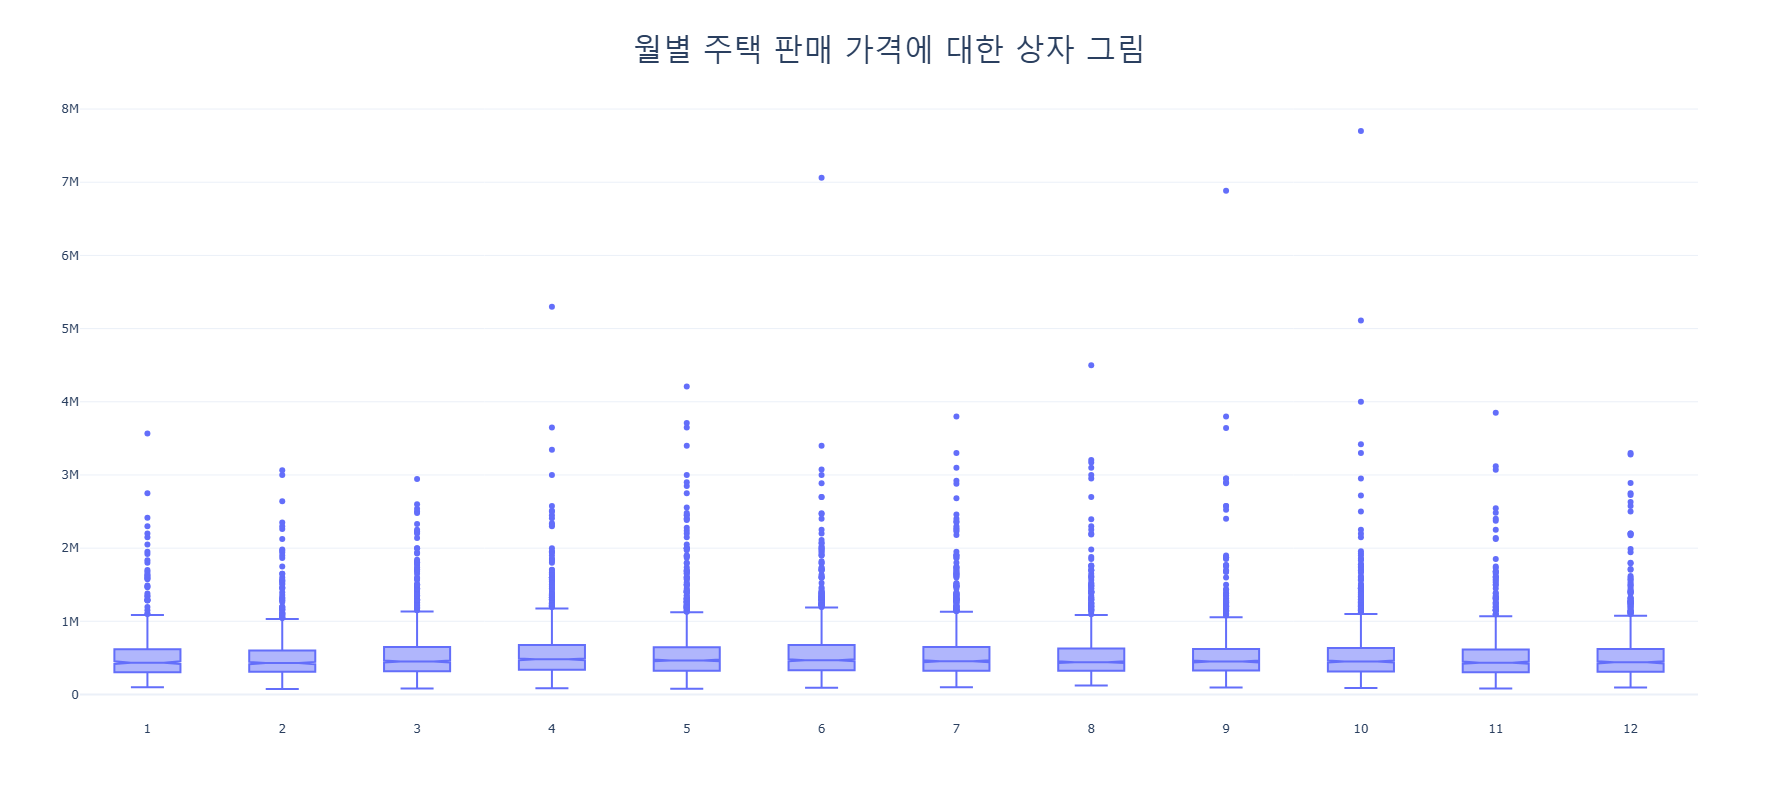

&nbsp; 월별 판매 가격의 변화량을 살펴보았으나, 거의 변화가 없었다. 단, notched 표시로 중위수의 신뢰구간을 살펴보았을 때, 신뢰구간이 겹치지 않는 월들이 분명히 존재하므로, 해당 변수가 유의하지 않다고 말하기엔 무리가 있다.

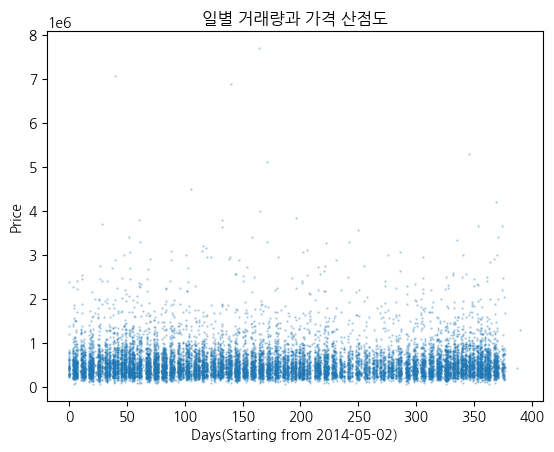

&nbsp; 거래일을 시작일인 `2014-05-02`부터의 날짜 차이로 변환하여 시각화하였다. 시간이 지남에 따라 차이가 명확하게 드러나지 않았다. 이에 따라 해당 설명변수가 반응변수에 큰 영향을 미치지는 못할 것이라 예상할 수 있다.

### **C. 실제 위치 별 주택 가격 시각화(Density mapbox)**

&nbsp; 해당 데이터는 실제 주택 거래 자료를 기반으로 하는 만큼, 주택의 위치 정보가 제공되어있다. 번화가나 상업 지구 등 상대적으로 인구가 밀집한 도심지에서는 주택의 가격이 높은 수준에서 형성되는 것이 일반적인 만큼, 이를 실제 지도에 표시하여 알아보고자 했다.

&nbsp; 시각화에 필요한 geojson 파일은 King County GIS open data 포털<sup>[1](#geojson)</sup>에서 얻었으며, 밝게 표시된 지점의 주택 가격이 비싸게 형성된 것이다.

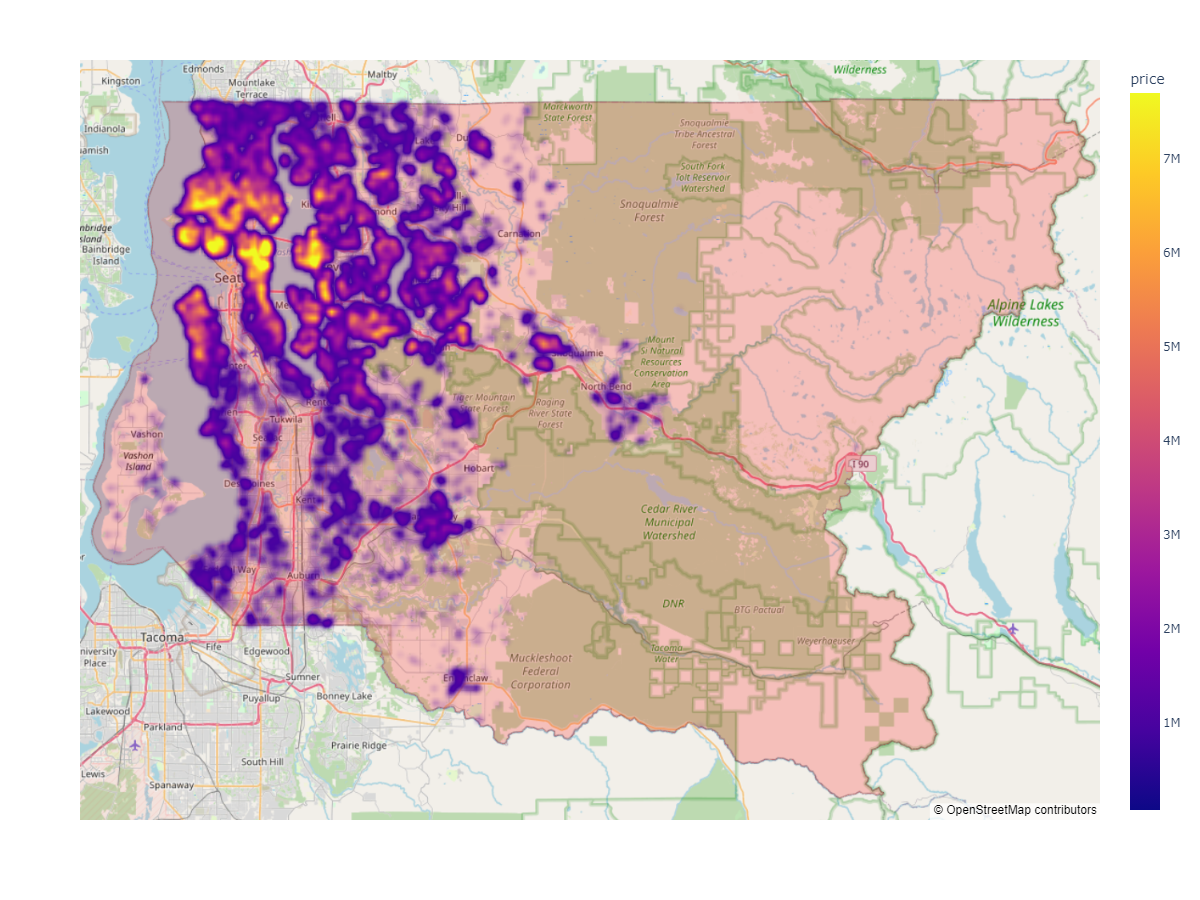

&nbsp; 시각화 자료에서 볼 수 있는 점은, 주택 거래가 해안가 인근 도심지에서 가장 많이 이뤄졌다는 것, 시애틀의 중심지로 갈 수록 주택 가격이 비싸졌다는 것이다. 해당 경향이 선형 관계를 띄지 않기 때문에, 해당 자료를 그대로 사용한다면 선형 모형에서는 위치 정보에 대한 데이터가 반응변수에 크게 유의하지 않을 가능성이 높다.

&nbsp; 또한 해안가 인근에서의 주택 가격이 높은 수준인 것으로 보이므로, `waterfront` 변수 또한 상당히 중요할 것으로 여겨진다.


<a name="geojson">1</a>: https://gis-kingcounty.opendata.arcgis.com/datasets/19b7f1e85a0f4c9ebfcc2830bd1d783e_121/explore?location=47.511766%2C-121.365368%2C8.86

### **D. 변수 간 선형 상관계수 히트맵(절대값 스케일)**

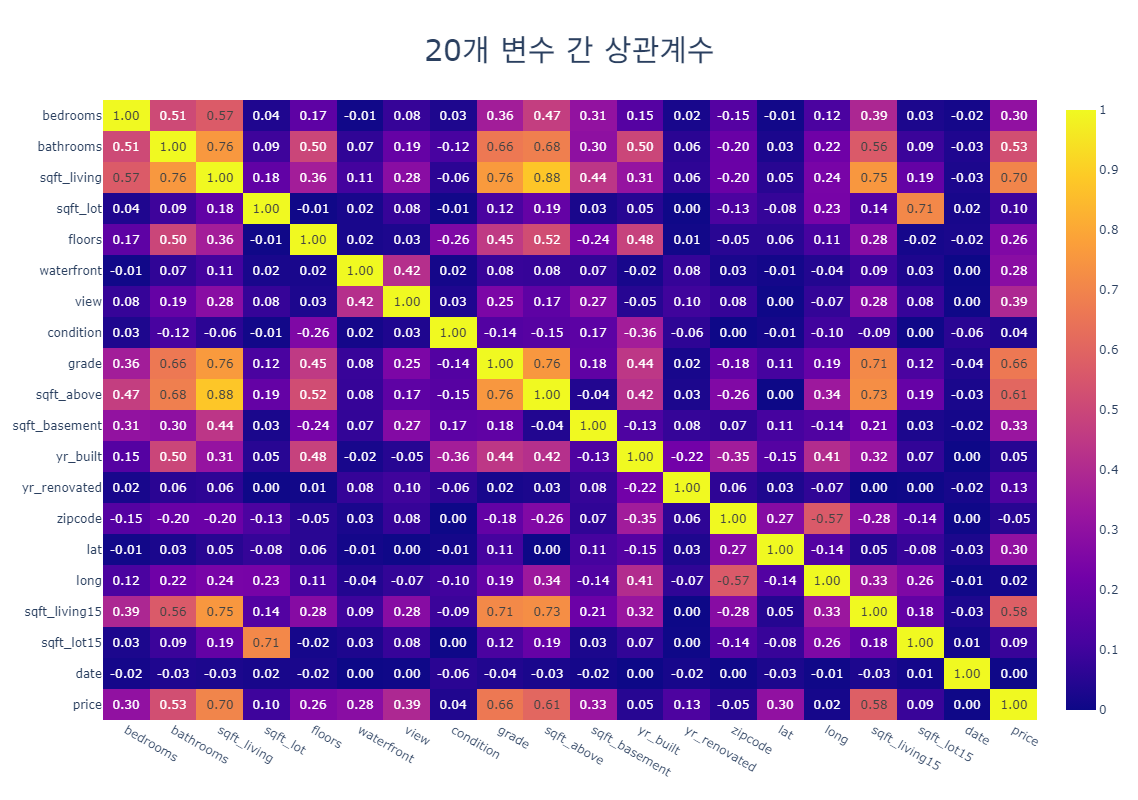

&nbsp; 변수 간 선형 상관관계를 파악하기 위해, 상관계수의 절대값을 히트맵으로 시각화하였다. 반응변수인 `price`와의 상관계수가 가장 낮은 세 변수는 차례대로 `date`, `long`, `condition`이었고, 그 중 `date` 변수는 타 변수들과의 상관계수도 매우 낮기 때문에 선형에선 독립적인 변수라고 생각된다.

&nbsp; 또한, `sqft_living`의 경우, `bathrooms`, `grade`, `sqft_above`, `sqft_living15`에 대하여 $0.7$ 이상의 높은 상관계수를 가졌다. 각 변수들이 실내 공간의 면적, 화장실의 수, 주택의 전반적 품질, 지하 공간의 면적, 인근 15개 주택 면적임을 생각하면, 생활 공간과 관련된 변수가 많기 때문에 설명변수 간 상관성은 상당히 높을 것이다. 따라서 다중공선성 문제에 유의하여 분석할 필요가 있다.

## **4. 일반 모형 적용 : 다중 선형 회귀모형**

---

&nbsp; 설명변수의 유의성 파악과 해석을 위해 가장 먼저 다중 선형 회귀모형을 적합하였다. 선형 회귀모형은 해석이 쉽다는 장점이 있으나, 해당 데이터의 경우 상관성이 높은 설명변수들이 존재하고, 예측변수와의 비선형 관계가 존재하기 때문에 적합 결과를 완전히 신뢰할 수는 없다.

&nbsp; 모형 적합에는 `sklearn` 모듈을 이용하였고, `statmodel` 모듈을 통해 각 설명변수의 유의성에 대한 $\text{ANOVA}$ 테이블을 산출해보았다. 모형 적합에 사용할 설명변수 중 `date`는 $1$월을 기준범주로 한 월별 더미 변수로 처리하여 모형에 추가하였고, 해당 변수들의 이름은 `month2 ~ month12`로 설정하였다. 설명변수들의 차수는 전부 $1$로 설정하였다.

<style>
  pre {
    font-size: 15px; /* 코드블록의 폰트 크기를 설정 */
    white-space: pre-wrap; /* 줄바꿈을 허용 */
    word-wrap: break-word; /* 긴 단어를 적절히 나눔 */
  }
</style>

```
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
intercept      7.575e+06   3.54e+06      2.141      0.032    6.39e+05    1.45e+07
bedrooms       -3.51e+04   2234.349    -15.710      0.000   -3.95e+04   -3.07e+04
bathrooms      4.274e+04   3889.469     10.988      0.000    3.51e+04    5.04e+04
sqft_living     110.5253      2.729     40.501      0.000     105.176     115.874
sqft_lot          0.1265      0.056      2.274      0.023       0.017       0.235
floors         9049.4422   4289.175      2.110      0.035     642.141    1.75e+04
waterfront     6.287e+05   2.01e+04     31.253      0.000    5.89e+05    6.68e+05
view           4.807e+04   2570.042     18.705      0.000     4.3e+04    5.31e+04
condition      2.899e+04   2819.808     10.282      0.000    2.35e+04    3.45e+04
grade          9.665e+04   2593.196     37.269      0.000    9.16e+04    1.02e+05
sqft_above       70.9692      2.705     26.240      0.000      65.668      76.271
sqft_basement    39.5561      3.207     12.333      0.000      33.270      45.843
yr_built      -2695.5188     87.213    -30.907      0.000   -2866.468   -2524.570
yr_renovated     18.7430      4.408      4.252      0.000      10.102      27.383
zipcode        -580.5128     39.892    -14.552      0.000    -658.706    -502.320
lat            5.985e+05   1.29e+04     46.532      0.000    5.73e+05    6.24e+05
long          -2.085e+05   1.59e+04    -13.137      0.000    -2.4e+05   -1.77e+05
sqft_living15    20.8194      4.147      5.020      0.000      12.691      28.948
sqft_lot15       -0.4071      0.088     -4.651      0.000      -0.579      -0.236
month_10       1.753e+04   9551.069      1.836      0.066   -1187.023    3.63e+04
month_11       9371.6459   1.01e+04      0.925      0.355   -1.05e+04    2.92e+04
month_12       3382.4909   9965.958      0.339      0.734   -1.62e+04    2.29e+04
month_2        1.688e+04   1.03e+04      1.633      0.103   -3385.975    3.72e+04
month_3        4.131e+04   9546.847      4.327      0.000    2.26e+04       6e+04
month_4        4.601e+04   9291.183      4.952      0.000    2.78e+04    6.42e+04
month_5        1.941e+04   9180.863      2.115      0.034    1418.210    3.74e+04
month_6        8085.4758   9308.660      0.869      0.385   -1.02e+04    2.63e+04
month_7        1.225e+04   9329.499      1.313      0.189   -6034.326    3.05e+04
month_8        1.068e+04   9526.824      1.122      0.262   -7988.983    2.94e+04
month_9        5031.5007   9617.267      0.523      0.601   -1.38e+04    2.39e+04
=================================================================================
```

&nbsp; 적합 결과, 해당 모형의 테스트 데이터에서의 $\text{RMSE}$는 $196439.3155$였으며, 유의수준 $\alpha = 0.05$에서 `date`와 관련된 변수를 제외하면 모두 반응변수 `price`에 유의한 영향을 미치고 있다. `date`와 관련된 월별 더미 변수들도 $3, 4, 5$월의 경우 기준범주인 $1$월과 유의한 차이를 보였으며, 이에 따라 각각 $3, 4, 5$월은 $1$월보다 평균적으로 $\$41309, ~ \$46012, ~\$19414$만큼 비싼 가격을 받았다고 말할 수 있다.

&nbsp; 또한, `date` 변수를 일별 수치형 변수로 처리하였을 때의 테스트 $\text{RMSE}$는 $196509.2480$로, 범주형 변수를 더미변수 처리한 것에 비해 더 낮은 성능을 보였다. RMSE의 차이가 크지 않은 점을 고려하면 선형 모형에서는 `date` 변수를 아예 제거하는 편이 더 바람직할 수도 있다. 하지만, 해당 변수의 유의성을 완전히 배제할 수 없는 만큼, 제거하지는 않도록 하였다.

## **5. 벌점 함수 적용 : RIDGE**

---

&nbsp; 벌점 함수를 적용한 모형 중 RIDGE Regression을 사용하여 모형을 적합하였다. RIDGE Regression은 변수 간 상관관계가 강할 경우 상당히 좋은 성능을 보이므로, 위에서의 선형 회귀 모형에서의 결과보다 예측 성능이 우수할 것으로 판단된다.

&nbsp; RIDGE Regression의 경우 설명변수의 스케일에 따라 결과의 차이가 존재하므로, 설명변수들을 정량화하기 위해 표준화를 수행하였다. 범주형 설명변수로 처리된 `date`, `waterfront` 변수는 표준화 대상에서 제외하였다.

&nbsp; 모형 적합에는 `sklearn` 모듈을 이용하였고, 손실함수에서 l2-norm 패널티항의 중요도를 나타내는 하이퍼파라미터 $\lambda$값은 $[0.00001, 10]$에서 로그 스케일로 탐색하여 $10\text{-fold}$ 교차 검증으로 구한 CV MSE를 가장 낮게 하는 경우와, 해당 MSE에서 1-se rule을 적용하여 구한 경우를 모두 구한 후 비교하기로 하였다. 또한, 반응변수인 `price`의 분포가 오른쪽으로 기울어져 있으므로, 선형에서 분석의 성능을 향상시키고자 파워 변환을 고려할 수 있다. 이 경우 적합된 모형에서의 예측값에 역변환을 하여 원래 스케일로 복원한 뒤 성능지표를 산출하여 비교하였다.

![Ridge CV-2.png](<attachment:Ridge CV-2.png>)
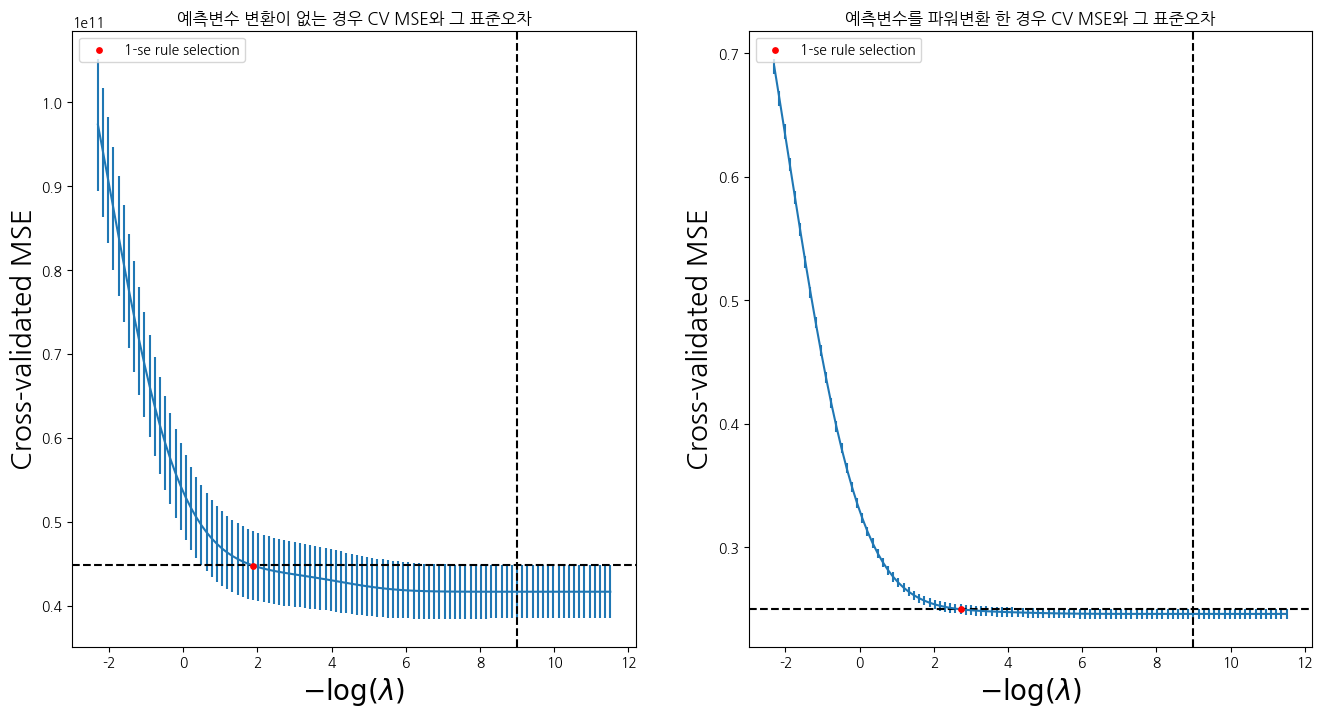

&nbsp; 그 결과, 반응변수 변환이 없는 경우에선 $\lambda = 0.00012$일 때 CV MSE가 가장 낮았으며, 1-se rule로 선택된 $\lambda = 0.15199$였다. 반응변수를 파워변환 한 경우에는 $\lambda = 0.00012$일 때 CV MSE가 가장 낮았으며, 1-se rule을 적용하면 $\lambda = 0.06579$였다.

&nbsp; 각각의 $\lambda$값과 변환에 대하여 모형을 구성한 뒤, `test dataset`에서의 RMSE를 계산하였다. 아래는 그 결과이다.

|반응변수 변환 여부|1-se rule 적용 여부|RMSE|
|:-:|:-:|:-:|
|변환 없음|적용 안함|196381.8609|
|변환 없음|1-se rule 적용|200062.3972|
|파워 변환|적용 안함|221208.7680|
|파워 변환|1-se rule 적용|240907.1497|


&nbsp; 반응변수를 그대로 사용하여 적합하고, 1-se rule을 적용하지 않았을 때의 test RMSE가 가장 작았다. 해당 경우에서의 RMSE는 다중선형회귀에서의 값 $196439.3155$와 비교하면 더 낮으므로, RIDGE regression model의 성능이 더 좋았다. 하지만 RMSE의 차이가 근소하다는 점에서 두 모형의 성능이 유의한 차이가 있다고 보기는 어렵다. RIDGE Regression은 변수 간 상관성을 완화시켜줄 수 있지만, 결국 선형 모형이라는 한계 때문에 비선형 관계를 잘 설명할 수 없었다.

## **6. 비선형 모형 적용 : GAM**

---

&nbsp; 일반화 가법 모형(GAM)은 개별 설명변수와 반응변수 간 비선형적 관계를 별도의 함수로 모델링한다. 이 경우 직접 항을 넣어주지 않는 이상 설명변수 간의 교호작용을 반영하지 못한다는 단점이 있지만, 이전까지 적합했던 선형 기반 모형에 대비하여 예측성능의 비약적인 향상이 이뤄질 것으로 예상된다.

&nbsp; 모형 적합에는 `pygam` 라이브러리의 `LinearGAM`을 이용하였다. 모든 설명변수들은 각각 스플라인을 적용시켜 결합하였다. 이진 설명변수인 `waterfront`의 경우 범주형으로 처리할 수 있으나, 이 경우에 예측 성능이 감소하는 현상이 발생하여 해당 변수 또한 스플라인 항으로 포함시켰다. 해당 방법부터 `date` 변수의 경우 월별 더미 변수로 처리하지 않고 일별 수치형 자료로 이용하였다. 각 스플라인의 smoothness 정도를 조정하는 하이퍼파라미터 `lam`은 설명변수 별로 지정해줄 수 있으나, 탐색할 공간이 너무 커지기 때문에 일괄적으로 같은 값을 설정하였다.

&nbsp; 하이퍼 파라미터의 튜닝은 해당 라이브러리 자체 제공 함수인 `gridsearch`를 통하여 결정하려 했으나, 이 경우 반응변수의 스케일에 비해 상당히 작은 값을 산출하면서 모형의 복잡성을 높이고 test MSE를 선형 모형에서의 결과보다 증가시키는 현상이 나타났다. 따라서 교차타당검증을 위한 코드를 따로 구현하여 구간 $[0.1, 10000]$에서 로그 스케일로 `lam`을 변화시켜가며 5-fold CV를 통해 CV MSE 값을 계산하고, 이를 가장 낮게 하는 모형과 해당 MSE에서 1-se rule을 적용하여 구한 경우를 비교하였다.

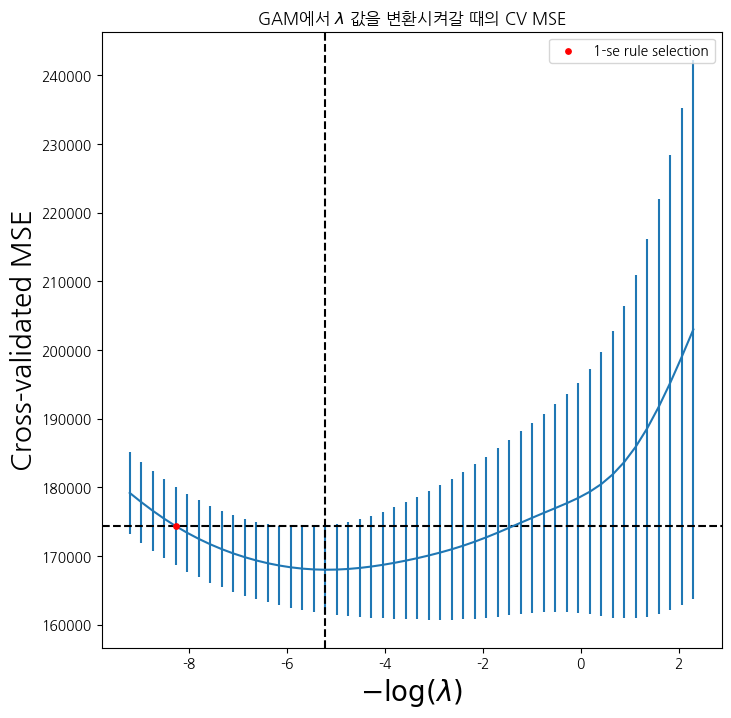

&nbsp; $\lambda$값에 따라 CV MSE를 그려보았다. $\lambda = 183.2070$일 때 CV MSE가 가장 작았으며, $\lambda$의 값이 커질수록 모형은 단순해지므로 1-se rule에 따라 선택된 $\lambda$ 값은 $3906.9399$였다.

&nbsp; 각각의 $\lambda$값에 대하여 모형을 구성한 뒤, `test dataset`에서 RMSE를 계산한 결과, $\lambda = 193.2070$일 때 RMSE는 $156864.5731$였고, $\lambda = 3906.9399$일 때 RMSE는 $165829.6970$였다. CV MSE 기준으로 선택된 $\lambda$ 값이 더 적절했으며, 해당 모형은 이전에 적합했던 선형 모형에 비해 RMSE가 $20\%$ 이상 감소하여 예측성능이 더 높았다.

## **7. 나무 모형**

---

&nbsp; 의사결정나무 모형은 예측변수들의 공간에 대한 층화적 분할을 통해 영역을 나누고, 주어진 관측값이 속한 영역의 반응변수 평균으로 회귀에서의 예측을 수행한다. 모형이 비선형 관계 및 설명변수 간 교호작용을 반영할 수 있다는 점을 고려하면, 선형 모형보다 더 좋은 성능을 보일 것으로 예상된다.

&nbsp; 모형 적합에는 `sklearn`을 사용하였으며, 가능한 모든 노드를 나눈 모형에서 가지치기하는 방식으로 최적의 모형을 선택하였다. 트리의 복잡도를 제어하는 하이퍼파라미터인 `ccp_alpha`에 대하여 가능한 모든 유의미한 값들로 그리드를 설정하여 최적의 값을 선택하고자 하였고, 비교를 위한 지표로는 5-fold cv error를 사용하였다.

<div style="text-align: center; font-size:large;">각 모형 별 test MSE의 비교</div>

![Tree Comparision-2.png](<attachment:Tree Comparision-2.png>)
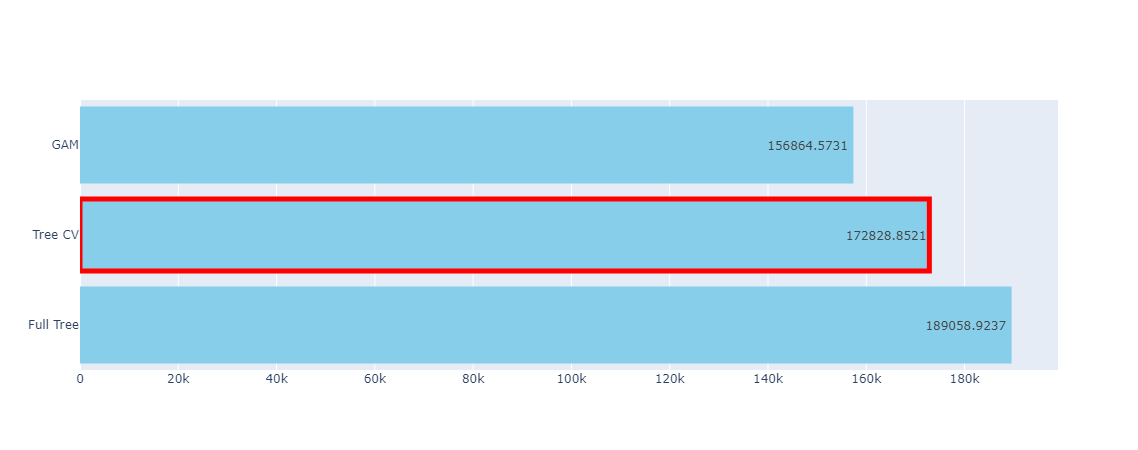

&nbsp; 적합 결과, 최적의 하이퍼파라미터는 `ccp_alpha = 11967239.87`로 도출되었고, 이 때의 리프 노드 개수는 총 436개였다. 해당 모형에서 RMSE 값은 $172828.8521$으로, 가지치기를 하지 않은 가장 복잡한 모형(Full Tree)과 test RMSE 비교에서 더 나은 성능을 보였지만 GAM으로 적합한 모형보다는 못하였다.

<div style="text-align: center; font-size:large;">상위 노드의 분할 구조 탐색</div>

![Tree viz-2.png](<attachment:Tree viz-2.png>)
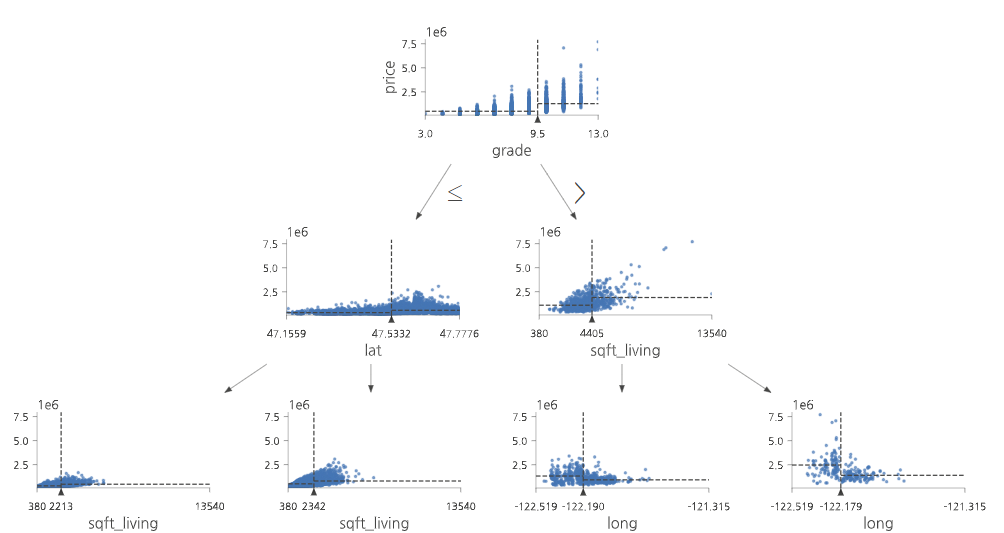

&nbsp; `dtreeviz`라이브러리를 이용하여 트리 모형에서 깊이 3까지 어떻게 분할되는지 시각화해보았다. 각 노드에서 세로로 그어진 점선은 노드 분할 기준을 의미하며, 그 양옆으로 그어진 점선은 반응변수의 평균 수준을 나타낸다.

&nbsp; 최상위 노드는 `grade`를 기준으로 나뉘었으며, 주택의 평수인 `sqft_living` 또한 노드 분할 과정에서 많이 관여하는 것을 확인할 수 있다. 주택의 입지와 관련된 위도(`lat`)와 경도(`long`) 또한 상위 노드 분할 기준으로 나타났다. 이 그래프를 통해 주택 가격에 영향을 미치는 중요한 요인은 크게 주택 품질 관련 요소와 입지의 두 가지로 구성된다고 예상할 수 있다.

## **8. 부스팅**

---

&nbsp; 여러 부스팅 모형 중 `XGBoost`를 통해 모형을 구성하였다. `XGBoost` 모형은 그래디언트 부스팅을 2차 미분까지 확장하여 모형을 개선하며, 복잡한 비선형 구조와 변수 간 교호작용을 잘 감지할 수 있다는 점에서 강력하다. 조정해야 할 하이퍼파라미터가 많기 때문에, 튜닝에는 그리드 서치를 사용하는 대신 Bayesian Optimization이 가능한 `skopt` 모듈을 이용하였다.

&nbsp; 튜닝한 하이퍼파라미터는 `learning_rate`, `n_estimators`, `gamma`, `max_depth`, `min_child_weight`, `colsample_bytree`, `subsample`, `sampling_method`, `lambda`, `alpha` 총 10개로 구성된다. 이 중 노드 분할 시 최소 손실 감소량을 의미하는 `gamma`와, 최소 헤시안 값을 나타내는 `min_child_weight`의 경우 반응변수의 스케일이 백만 단위에 가깝기 때문에 그 값도 같이 커질 수 있다. 따라서 로그 스케일로 최적값을 탐색하는 것이 바람직하다고 판단했다. 같은 이유로 가중치의 정규화 정도를 나타내어 과적합을 방지하는 `lambda`와 `alpha` 또한 로그 스케일로 탐색하였다.

<div style="text-align: center; font-size:large;"><하이퍼 파라미터 탐색 공간의 범위></div>

|hyperparameter|searching space|
|:-:|:-:|
|learning_rate|(0.001, 0.1)|
|n_estimators|(100, 1000)|
|gamma|(1e-1, 1e+6)|
|max_depth|(1, 10)|
|min_child_weight|(1e-2, 100)|
|colsample_bytree|(0.2, 0.7)|
|subsample|(0.5, 1.0)|
|sampling_method|[uniform, gradient_based]|
|lambda|(0.1, 10000)|
|alpha|(0.01, 1000)|

&nbsp; 4-fold로 적합 결과 최적의 하이퍼 파라미터는 아래와 같다.

<div style="text-align: center; font-size:large;"><최적의 하이퍼 파라미터></div>

|hyperparameter|optimal value|
|:-:|:-:|
|learning_rate|0.0940|
|n_estimators|1000|
|gamma|9571.96|
|max_depth|4|
|min_child_weight|1.7378|
|colsample_bytree|0.4693|
|subsample|0.5|
|sampling_method|`gradient_based`|

&nbsp; 이 때 test dataset에서 산출한 RMSE는 $107775.8804$이며, 해당 값은 모든 하이퍼파라미터를 디폴트로 놓고 적합한 모형의 RMSE $= 114593.1858$보다 작았다.

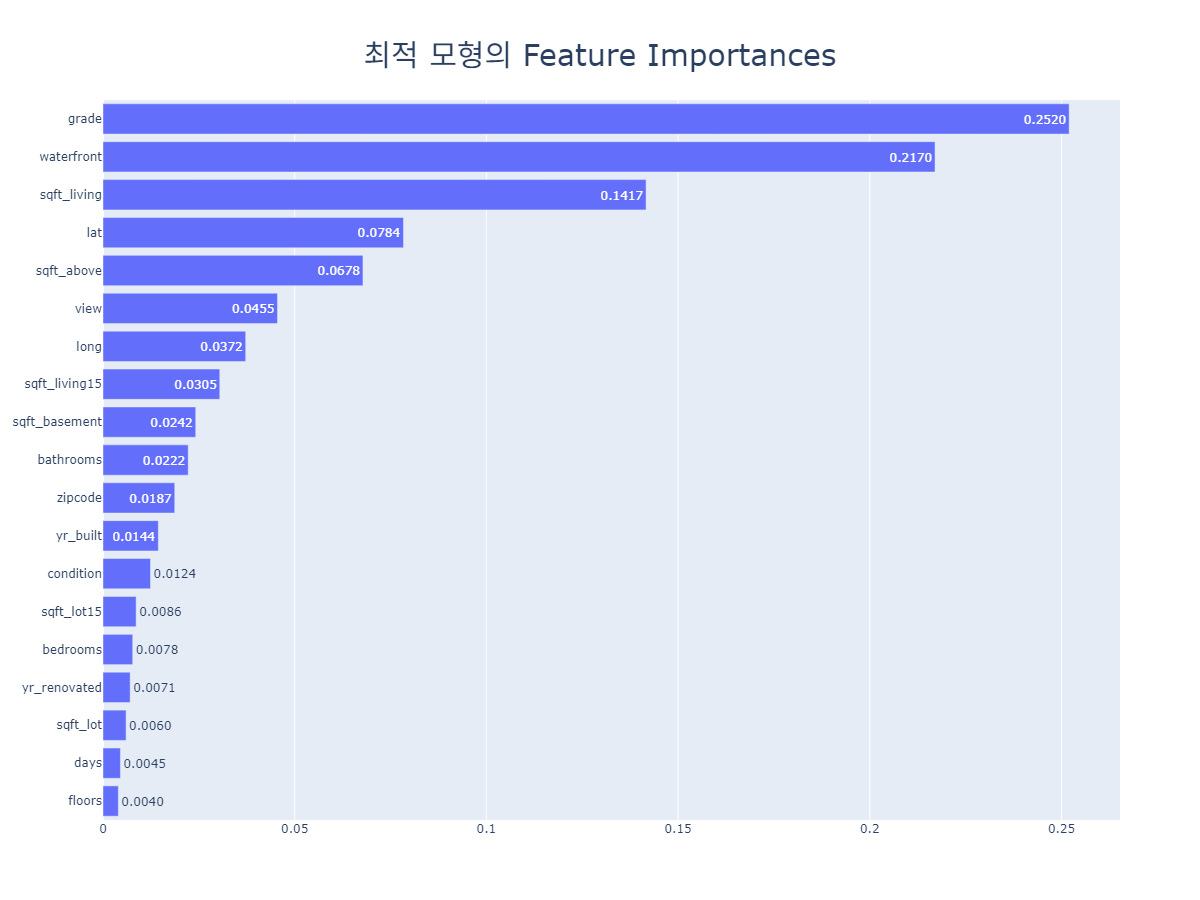

&nbsp; 최적 모형에서 개별 설명변수들의 중요성을 식별하고자 Feature Importances를 그래프로 나타내었다. 해당 값들은 노드가 특정 설명변수로 분할되었을 때 얻은 성능 상의 이득을 총합을 1로 하여 상대적으로 비교한 것이다.

&nbsp; 가장 중요한 변수는 주택의 전반적인 품질 수준이었고, 물가를 바라보고 있는지의 여부인 `waterfront`나 위도와 경도 같은 위치 정보의 중요도도 상위에 위치하였다. 이는 EDA에서 지도를 활용한 그림에서 대략적으로 식별한 것과 일치한다. 이에 따라 주택의 입지에 해당하는 요인들이 주택의 크기, 품질과 같은 정량적 요인과 주택 가격 형성에 비슷한 수준의 기여를 한다고 평가할 수 있다.

## **9. SVM**

---

&nbsp; 서포트 벡터 머신은 적절한 decision boundary를 선정하여 분류 문제를 해결하는 알고리즘이다. 해당 데이터에선 반응변수가 수치형이므로, 서포트 벡터 머신을 바로 적용하는 것은 불가능하다. 이에 따라 반응변수인 주택 가격을 중위수를 기준으로 고가와 저가 두 그룹으로 나누어 분류하는 방법을 고려하였다.

&nbsp; 서포트 벡터 머신은 고차원에서도 작동하나, 위도와 경도 데이터만을 이용하여 주택 가격을 분류하였다. 해당 분석은 주택 가격이 높은 수준으로 형성된 지역을 식별한다는 점에서 의의가 있을 것으로 파악된다.

&nbsp; 모형 적합에는 `sklearn`을 사용하였으며, 비선형 분류 문제를 다루고 있으므로 가우시안 커널을 이용하였다. margin의 크기를 조정하는 하이퍼파라미터 `c`와 가우시안 커널에서 인접 데이터 포인트의 영향력을 결정하는 하이퍼파라미터 `gamma`는 그리드를 설정하여 최적의 값을 결정하였다.

&nbsp; 최초의 탐색 공간은 `c`는 [0.1, 1, 10, 100, 1000], `gamma`는 [0.5, 1, 2, 3, 4]로 설정하였다. 선택의 기준은 5-fold CV에서 정확도를 최대로 하는 모형이다. 이 때, 최적의 하이퍼 파라미터가 탐색 공간의 끝값인 (1000,4)로 선택되었으므로, 하이퍼파라미터가 최적값이 아닐 가능성이 높아 `c`를 [1000, 5000, 10000], `gamma`를 [10, 1000]에서 로그 스케일로 그리드를 설정하여 다시 튜닝을 진행하였다. 적합 결과 최적의 하이퍼 파라미터는 `c`가 10000, `gamma`가 1000이었다.

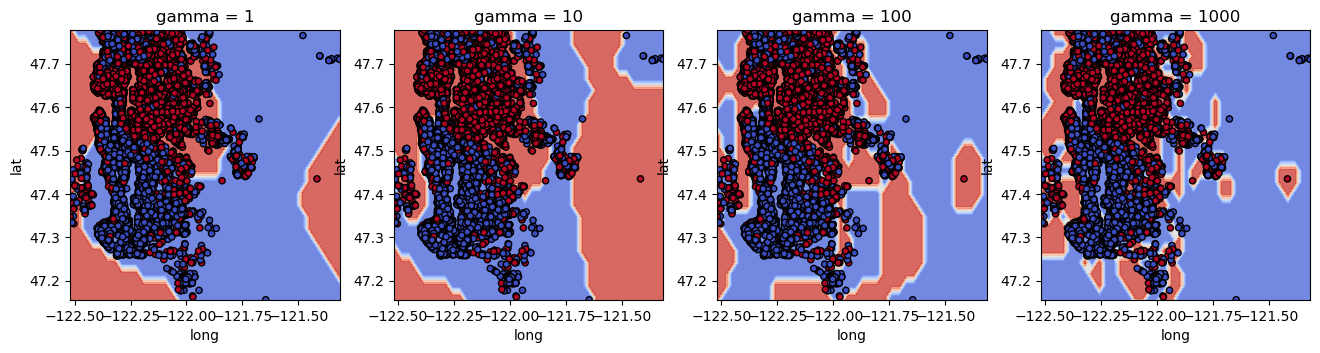

&nbsp; 위 그래프는 `c`를 1000으로 고정시키고 `gamma`를 조정하였을 때의 decision boundary 변화를 시각화한 것이다. `gamma`의 값이 커질수록, 인접한 데이터 포인트들의 영향력이 커지게 되어 desicion boundary가 더욱 복잡한 형태로 바뀌는 것을 관찰할 수 있다. 모든 경우에서 맨허튼 인근을 고가 구역으로 분류한 것을 보면 중심지의 위치를 대략적으로 파악할 수 있다. 또한 `gamma`가 10 이하일 때, 모형이 우측 중앙의 이상치에 큰 영향을 받고 있기 때문에, 해당 값을 큰 스케일로 잡는 것이 예측 성능 향상에 도움이 될 것으로 보인다.

<div style="text-align: center; font-size:large;">최적의 모형에 대한 Confusion Matrix</div>

||high(True)|low(True)|
|:-:|:-:|:-:|
|high(Predict)|2655|482|
|low(Predict)|564|2783|

&nbsp; 테스트 데이터에서 적합 결과를 혼동행렬로 나타내었을 때, 해당 모형이 나름대로 높은 0.8387의 정확도를 보여주고 있음을 확인할 수 있다. 또한 decision boundary와의 거리를 cutoff value로 변화시켜가며 ROC Curve를 그렸을 때, AUC 값은 ~이었다.

![ROC curve.png](<attachment:ROC curve.png>)
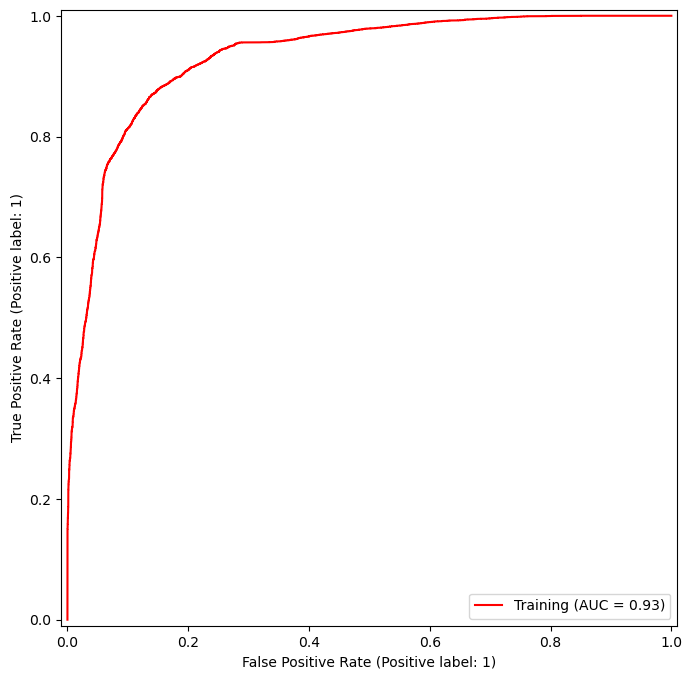

## **10. 비지도학습 : 차원 축소**

---

&nbsp; EDA 과정에서 언급했듯이, 공간 관련 데이터는 선형 모형으로 적합하고자 할 때 특별한 변환이 필요해보인다. 이에 따라 KPCA를 통한 차원 축소를 고려해보았다.

![KPCA merged image.png](<attachment:KPCA merged image.png>)
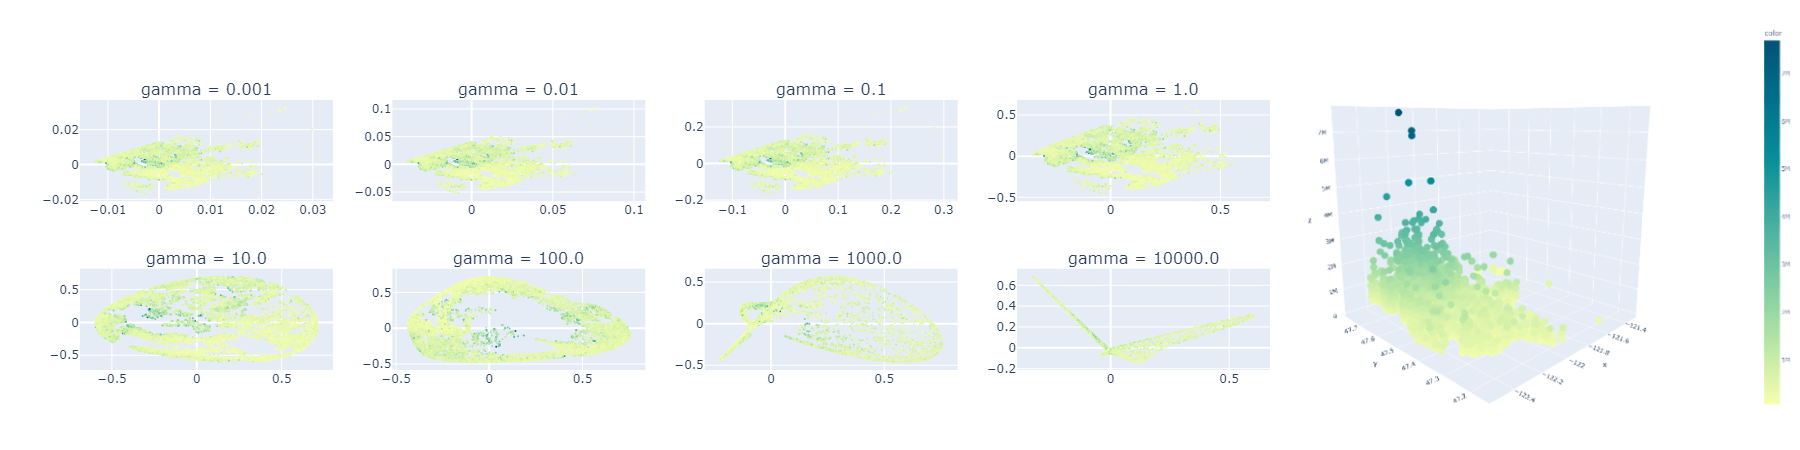

&nbsp; 위 그림은 가우시안 커널을 사용한 KPCA에서 `gamma` 값을 변화시킴에 따라 데이터의 구조가 어떻게 바뀌는지를 시각화한 것이다. 본래 목적은 왼쪽 3D 형태의 원 그래프처럼 높은 가격대가 형성된 중심지를 식별하고, 중심지와의 먼 정도를 1차원의 값으로 수치화하는 것이었다. 하지만 커널로 변환된 형태가 원하는 방향과는 달랐다. 아마 주택 거래 발생 위치의 밀도가 균일한 상황 등으로 인해 특별한 비선형 구조를 식별할 수 없었던 것으로 파악된다.

&nbsp; 이 방법에 대한 대안으로, 중심지를 직접 식별한 뒤 해당 지점과의 거리를 계산하여 새로운 설명변수 값으로 채택하는 방안을 고려해보았다. 이 때, 중심 지역은 가장 높은 거래 가격을 가졌던 지역으로 설정하였다.

![distance variable.png](<attachment:distance variable.png>)
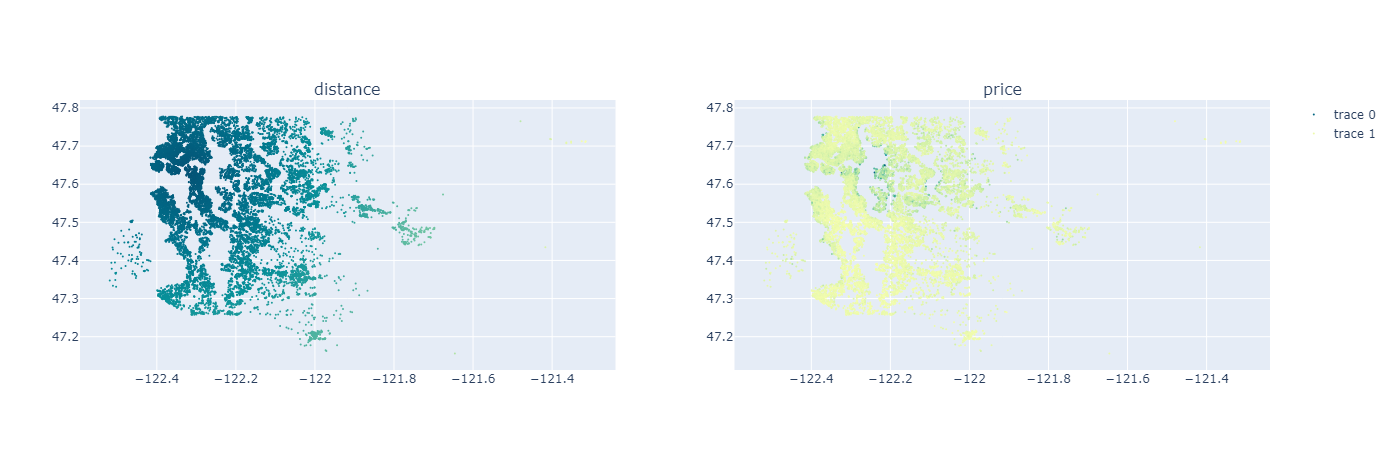

&nbsp; 그림으로 비교해보았을 때, `price` 변수의 경우 높은 수준에서 이상치가 많아 그래프의 색상 계열은 일치하지 않지만 진한 구역을 비교해보면 공통적인 요소가 존재함을 확인할 수 있었다.

&nbsp; 또한, 생활공간과 관련이 있는 설명변수들의 상관성이 존재하는 것을 고려하여 일반적인 선형 PCA로 설명변수를 저차원으로 사영시키고자 하였다. 설명변수 간 선형 상관관계가 있을 경우 다중공선성의 문제가 발생하여 예측 분산이 커지는 현상이 생긴다. 따라서 전체 주성분의 일부를 설명변수로 사용하는 주성분 회귀를 통해 성능 향상을 도모하였다. 사용할 주성분의 수는 10-fold CV MSE를 기준으로 결정하였다.

<div style="text-align: center; font-size:large;">각 모형 별 test MSE의 비교</div>

![Linear comparision.png](<attachment:Linear comparision.png>)
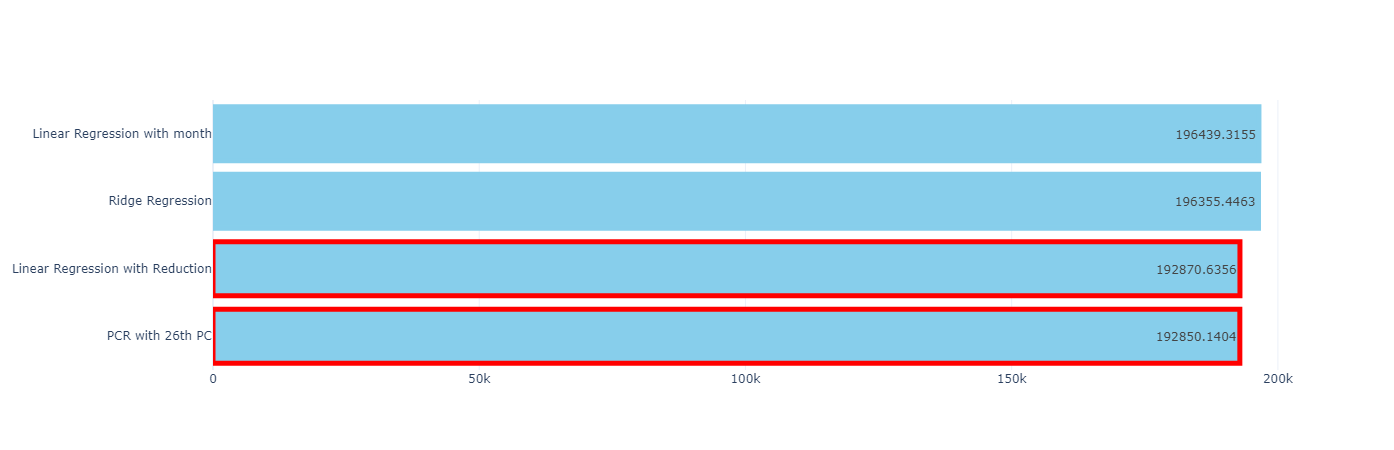

&nbsp; 위 그래프는 위도/경도를 거리로 바꾸기만 했을 때의 모형과, 26번째 주성분까지 활용한 PCR 모형을 적합하고 test RMSE를 비교한 것이다. 기존 선형 회귀 모형은 물론이고, Ridge Regression 모형보다 성능이 개선되었음을 확인할 수 있었다.